<a href="https://colab.research.google.com/github/Lizochka1511/Valuk/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D0%A0%D0%BE%D0%B1%D0%BE%D1%82%D0%B07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Результати обчислень для Варіанта №1 ---
Наближене значення f(1.416) ≈ 0.88822
Наближене значення f(1.456) ≈ 0.89685



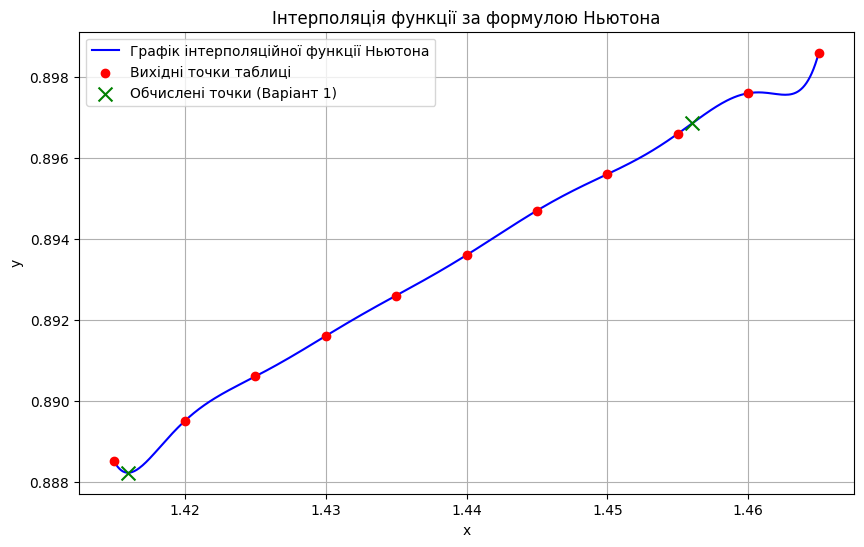

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Дані з Таблиці 1
x_points_all = np.array([1.415, 1.420, 1.425, 1.430, 1.435, 1.440, 1.445, 1.450, 1.455, 1.460, 1.465])
y_points_all = np.array([0.8885, 0.8895, 0.8906, 0.8916, 0.8926, 0.8936, 0.8947, 0.8956, 0.8966, 0.8976, 0.8986])

# Значення аргументів для Варіанта №1
x_target_1 = 1.416
x_target_2 = 1.456

# --- Функція для інтерполяції Ньютона (на основі поділених різниць) ---
def newton_interpolation(x_data, y_data, x_eval):
    """Обчислює значення полінома Ньютона в точці(ах) x_eval."""
    m = len(x_data)
    a = np.copy(y_data)
    # Обчислення таблиці поділених різниць
    for k in range(1, m):
        a[k:m] = (a[k:m] - a[k-1]) / (x_data[k:m] - x_data[k-1])

    # Обчислення полінома в заданих точках
    p = np.zeros_like(x_eval, dtype=float)
    if x_eval.shape == (): # If x_eval is a single value
        p = a[m-1]
        for k in range(1, m):
            p = a[m-1-k] + (x_eval - x_data[m-1-k]) * p
    else: # If x_eval is an array
        for i in range(len(x_eval)):
            p[i] = a[m-1]
            for k in range(1, m):
                p[i] = a[m-1-k] + (x_eval[i] - x_data[m-1-k]) * p[i]
    return p

# --- 1. Обчислення значень для Варіанта №1 ---
y_approx_1 = newton_interpolation(x_points_all, y_points_all, np.array(x_target_1))
y_approx_2 = newton_interpolation(x_points_all, y_points_all, np.array(x_target_2))

print(f"--- Результати обчислень для Варіанта №1 ---")
print(f"Наближене значення f({x_target_1}) ≈ {y_approx_1:.5f}")
print(f"Наближене значення f({x_target_2}) ≈ {y_approx_2:.5f}\n")

# --- 2. Побудова графіка інтерполяційної функції ---

# Діапазон x для гладкого графіка
x_plot = np.linspace(min(x_points_all), max(x_points_all), 400)
y_plot = newton_interpolation(x_points_all, y_points_all, x_plot)

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, label='Графік інтерполяційної функції Ньютона', color='blue')
plt.scatter(x_points_all, y_points_all, color='red', zorder=5, label='Вихідні точки таблиці', marker='o')
plt.scatter([x_target_1, x_target_2], [y_approx_1, y_approx_2], color='green', zorder=5, label='Обчислені точки (Варіант 1)', marker='x', s=100)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Інтерполяція функції за формулою Ньютона')
plt.legend()
plt.grid(True)
plt.show()
